In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/home/dmartins/GitWorkspace/phd-query-synthesis/PhDCoding


In [3]:
import warnings; warnings.simplefilter('ignore')

In [4]:
import pandas as pd
import numpy as np
import os
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import somoclu

In [5]:
cartable = pd.read_pickle(os.path.join('datasets', 'car_original_dataset.pkl'))
cartable.columns = [str.lower(col.replace('.', '_')) for col in cartable.columns]
cartable['origin'] = cartable['origin'].map({0: False, 1: True})
cartable['automatic_gearbox'] = cartable['automatic_gearbox'].map({0: False, 1: True})

In [6]:
preprocessed_data = pd.read_pickle(os.path.join('datasets', '1993CarsPrep.pkl'))

In [7]:
concept = cartable.query("type == 'Sporty' and origin == 0").index.to_list()

In [8]:
factor_ex = 0.2
example_size = math.ceil(len(concept) * factor_ex)

In [9]:
example_ids = random.choices(concept, k=example_size)

In [10]:
prep_examples = preprocessed_data.loc[example_ids]

In [11]:
data = preprocessed_data.values

In [12]:
def get_label(idx, concept):
    if idx in concept:
        return 'Positive'
    else:
        return 'Unlabeled'

labels = [get_label(x, concept) for x in range(1, data.shape[0]+1)]

In [13]:
x_size = 10
y_size = 10
from minisom import MiniSom
som = MiniSom(x_size, y_size, len(data[0]), sigma=3, learning_rate=0.1, 
              neighborhood_function='gaussian')

In [14]:
som.pca_weights_init(data)
som.train_random(data, 10000, verbose=False)

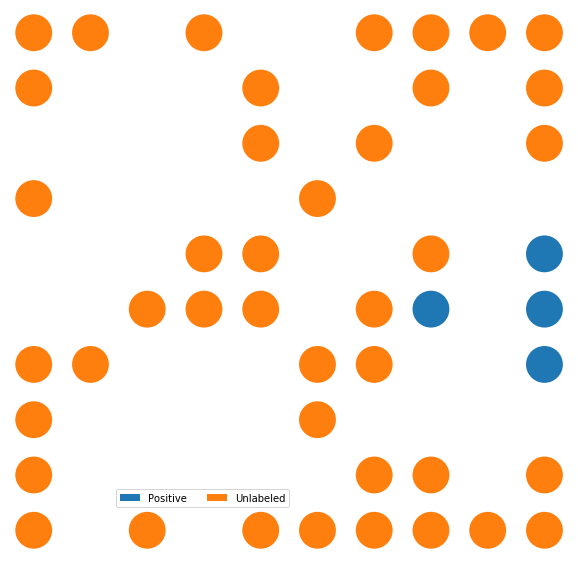

In [15]:
labels_map = som.labels_map(data, labels)
label_names = np.unique(labels)

plt.figure(figsize=(x_size, y_size))
ax = plt.gca()
ax.set_facecolor('xkcd:white')
the_grid = GridSpec(x_size, y_size)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[x_size-1-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0, 1.5), ncol=3)
#plt.savefig('som_car_pies.png')
plt.show()

In [16]:
labels_map = som.labels_map(data, labels)
label_names = labels

In [17]:
for cnt, vec in enumerate(prep_examples.values):
    winner = som.winner(vec)
    print(labels_map[winner])
    predicted_labels = list(labels_map[winner].keys())
    
    if 'Positive' in predicted_labels:
        print('Positive')
    else:
        print('Negative')

Counter({'Positive': 2})
Positive
Counter({'Positive': 2})
Positive


In [18]:
def get_classification(item, labels_map, som):
    winner = som.winner(item)
    for x in labels_map[winner].most_common():
        if len(x) > 0:
            for j in x:
                if 'Positive' == j:
                    print(True)
                    return 'Positive'
        
    return 'Negative'

In [19]:
def get_expected_label(idx, concept):
    if idx in concept:
        return 'Positive'
    else:
        return 'Negative'
    
expected = [get_expected_label(x, concept) for x in cartable.index.to_list()]
predicted = [get_classification(x, labels_map, som) for x in data.tolist()]

True
True
True
True
True
True
True
True


In [20]:
print(classification_report(expected, predicted))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        85
    Positive       1.00      1.00      1.00         8

   micro avg       1.00      1.00      1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93



In [21]:
n_rows, n_columns = 5, 10 #aspect ratio 16:9 #6, 8 #aspect ratio 4:3
som = somoclu.Somoclu(n_rows=n_rows, n_columns=n_columns, compactsupport=False, initialization='pca')
%time som.train(data=data, epochs=1000, radius0=max(n_rows, n_columns)*0.2)

CPU times: user 1.55 s, sys: 27.7 ms, total: 1.58 s
Wall time: 596 ms


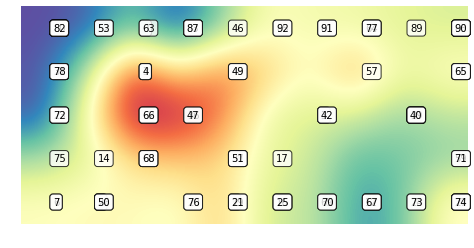

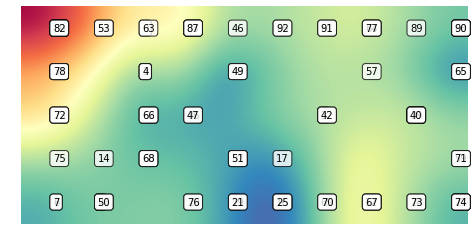

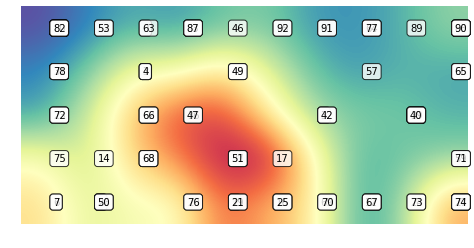

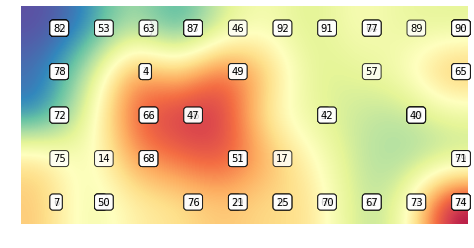

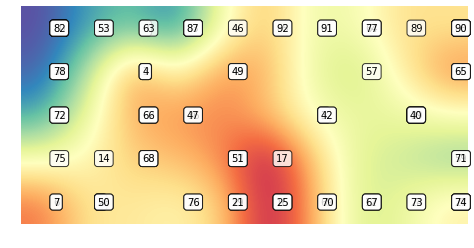

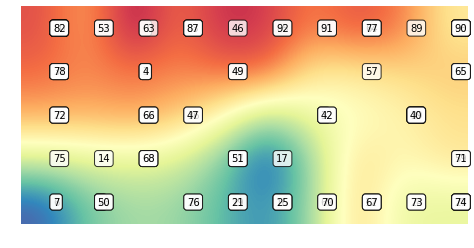

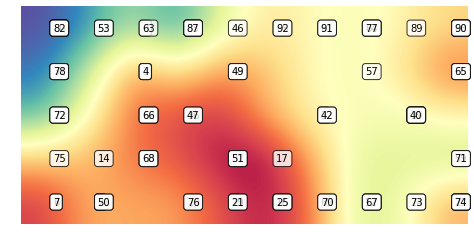

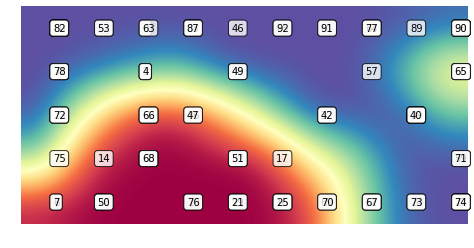

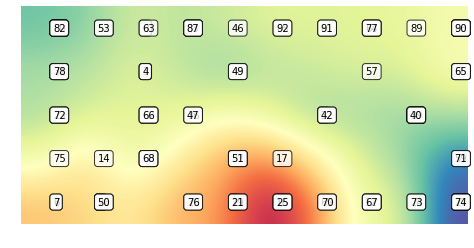

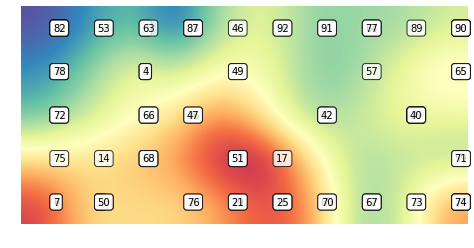

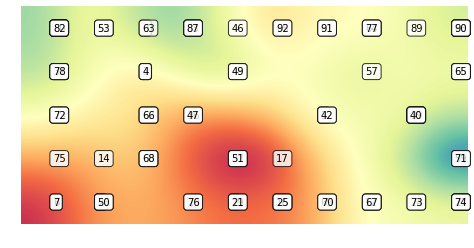

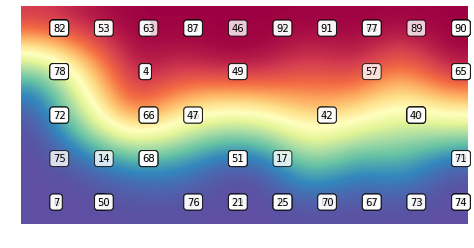

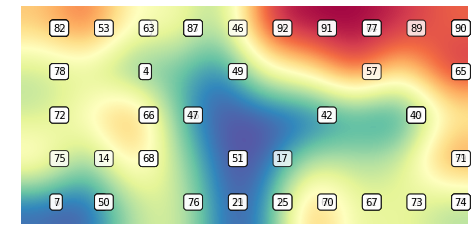

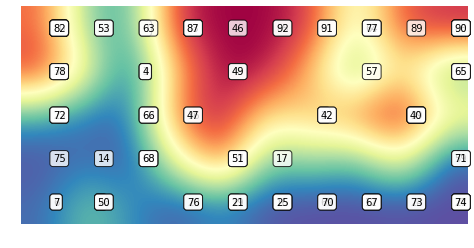

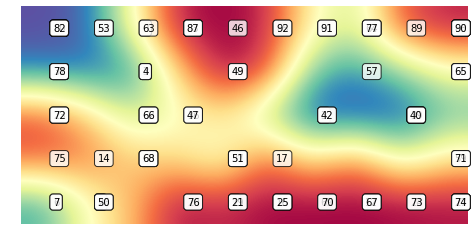

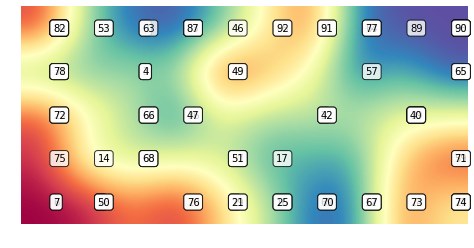

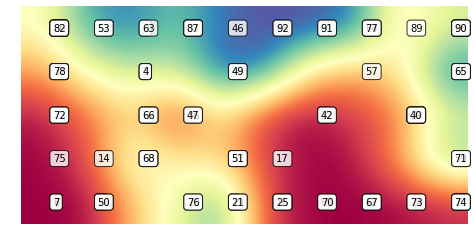

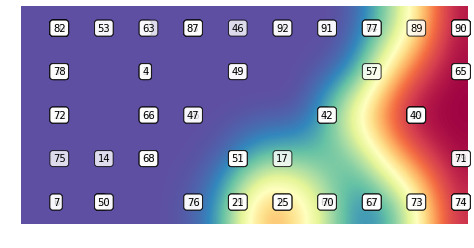

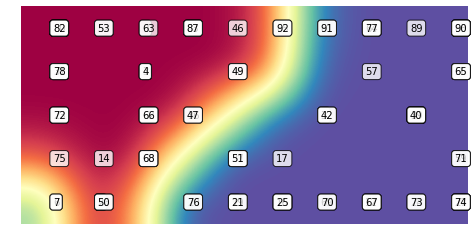

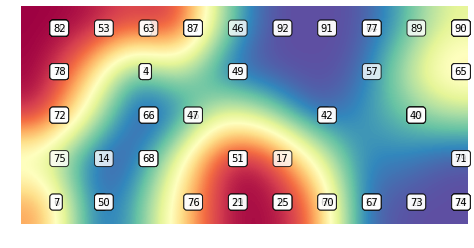

<module 'matplotlib.pyplot' from '/home/dmartins/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [22]:
som.view_component_planes(labels=[i for i in range(cartable.shape[0])])

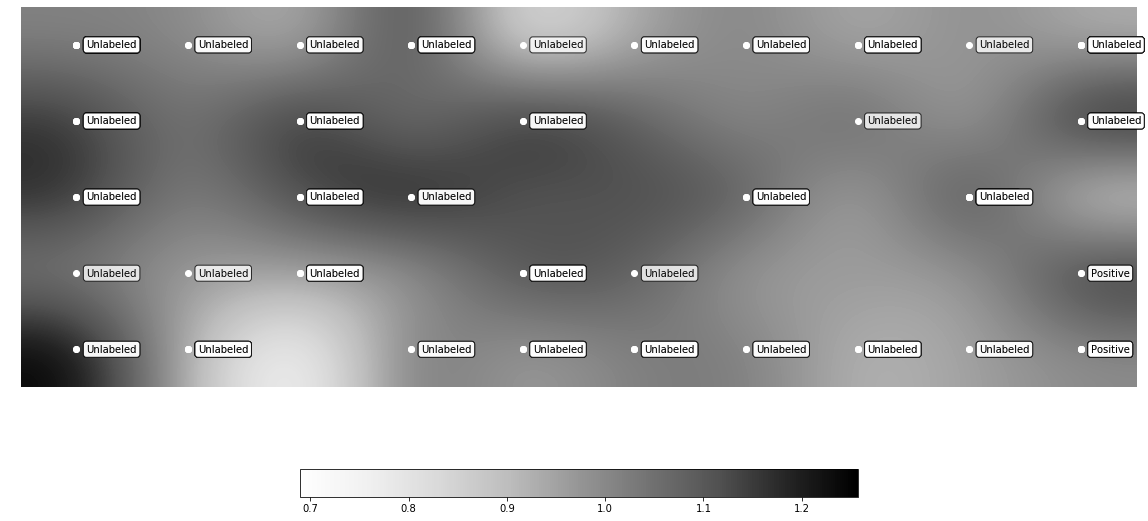

<module 'matplotlib.pyplot' from '/home/dmartins/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [23]:
som.view_umatrix(bestmatches=True, labels=labels, colormap='Greys', colorbar=True, figsize=(n_columns*2, n_rows*2))

In [24]:
from sklearn.cluster import KMeans
algorithm = KMeans(n_clusters=2)
som.cluster(algorithm=algorithm)

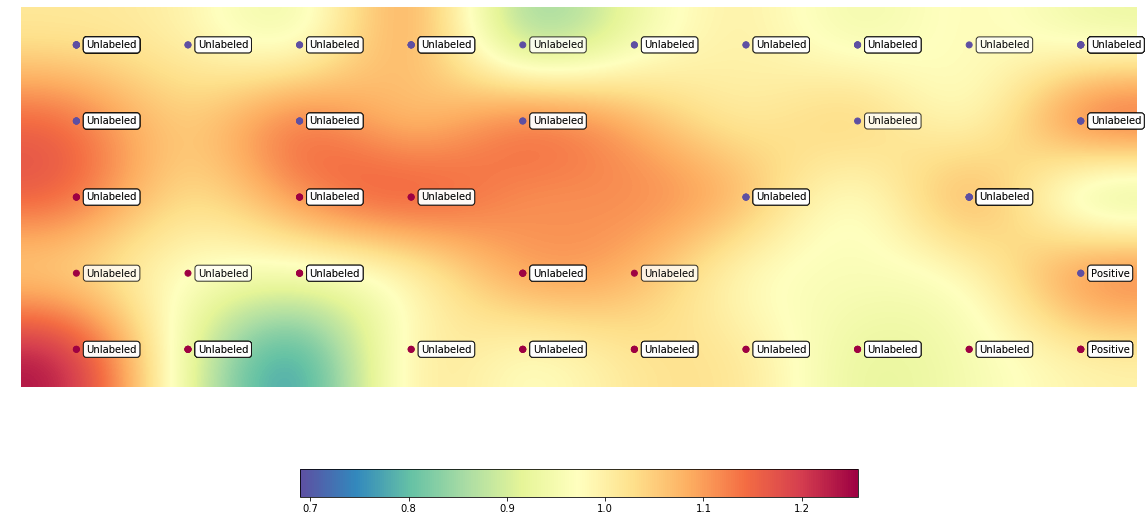

<module 'matplotlib.pyplot' from '/home/dmartins/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [25]:
som.view_umatrix(bestmatches=True, labels=labels, colorbar=True, figsize=(n_columns*2, n_rows*2))

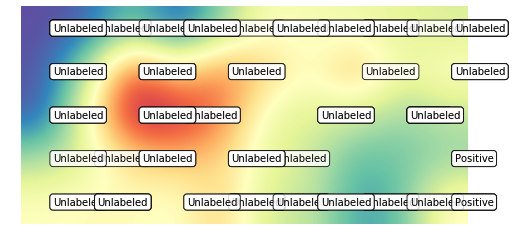

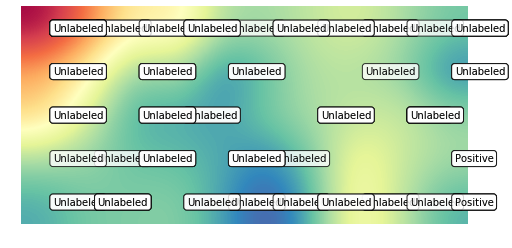

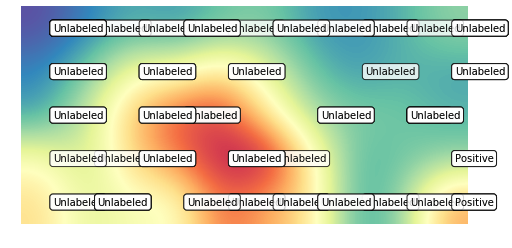

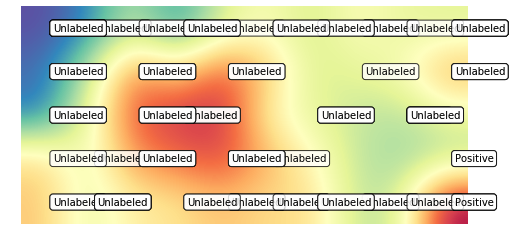

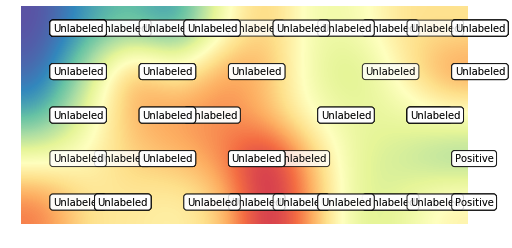

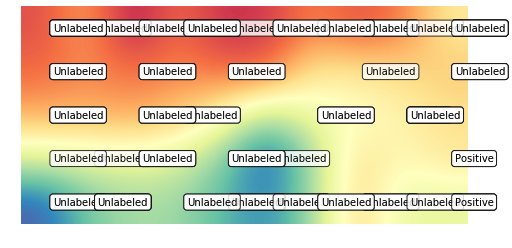

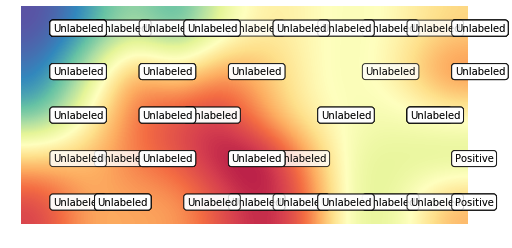

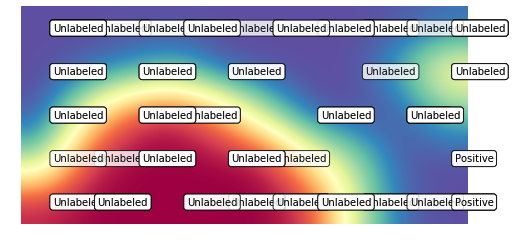

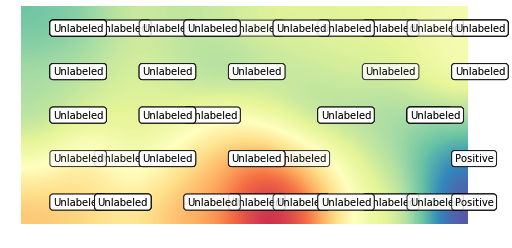

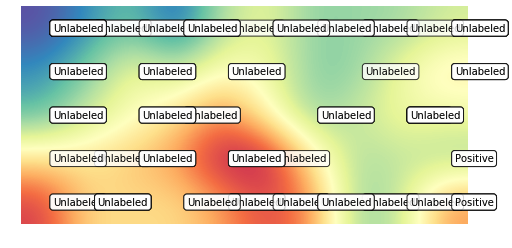

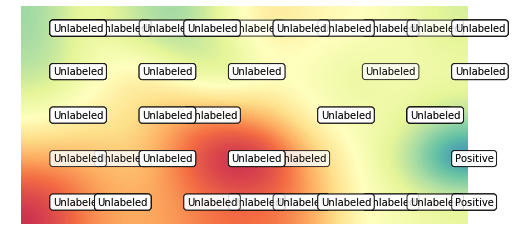

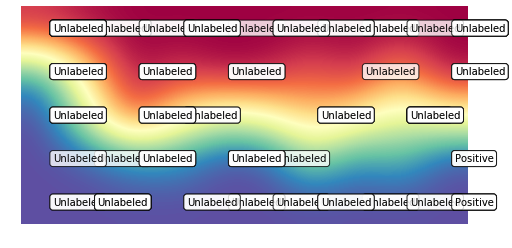

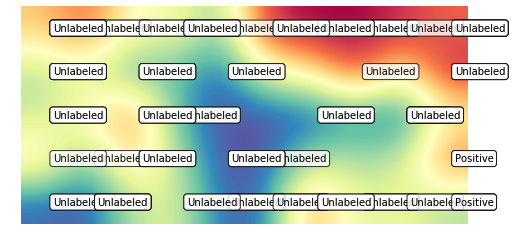

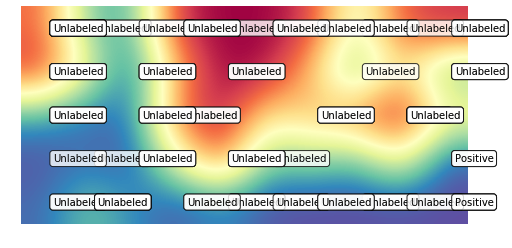

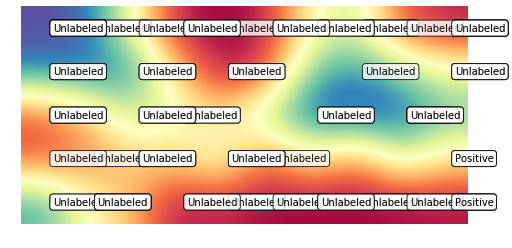

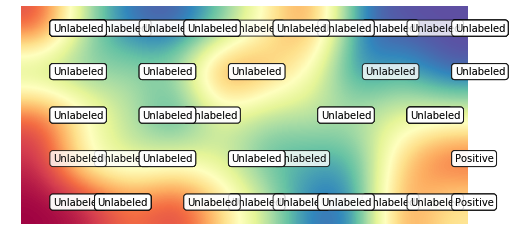

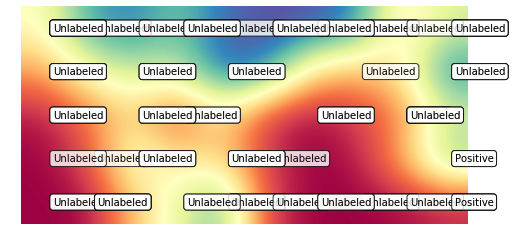

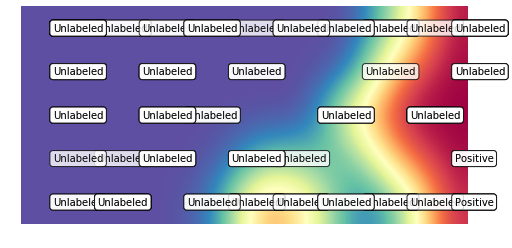

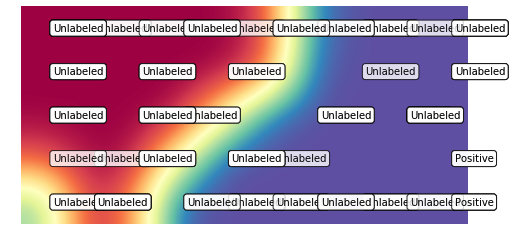

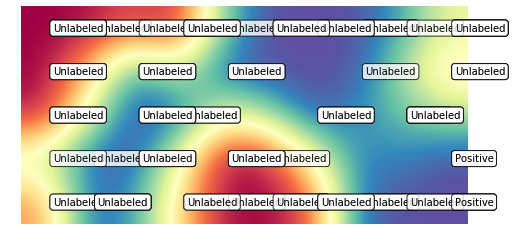

<module 'matplotlib.pyplot' from '/home/dmartins/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [26]:
som.view_component_planes(labels=labels)

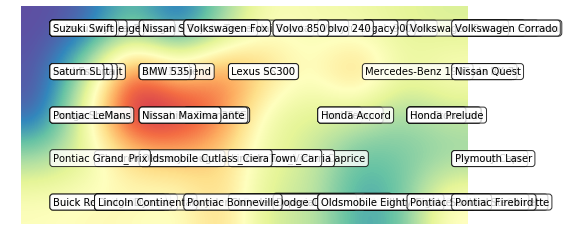

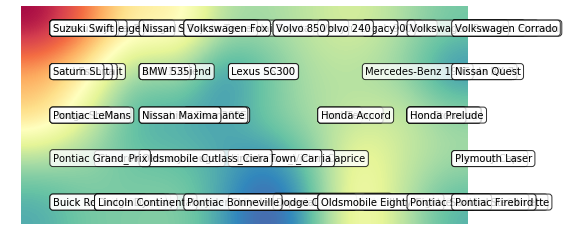

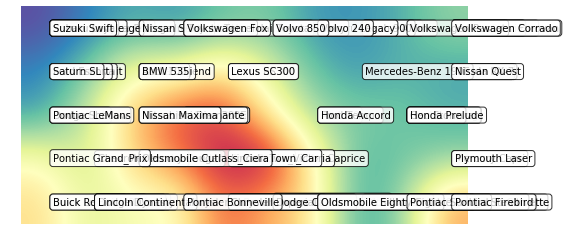

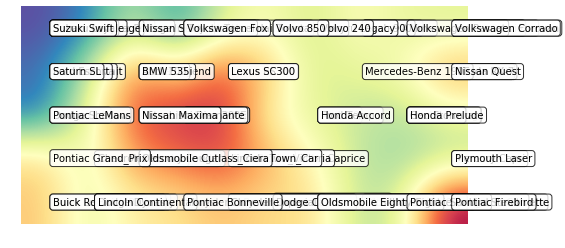

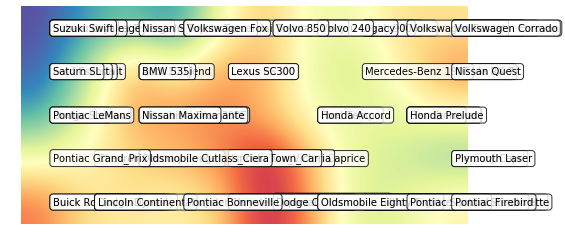

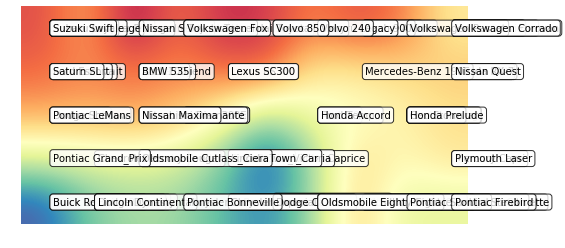

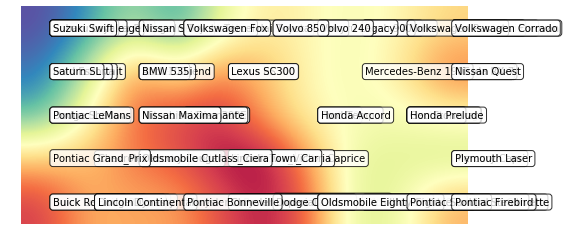

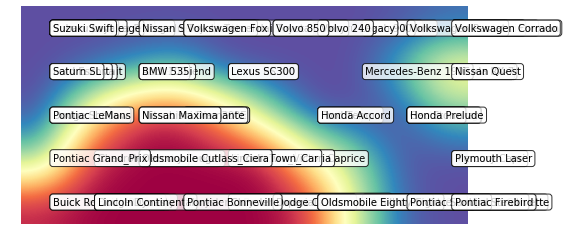

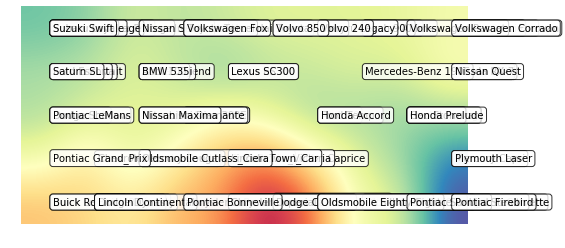

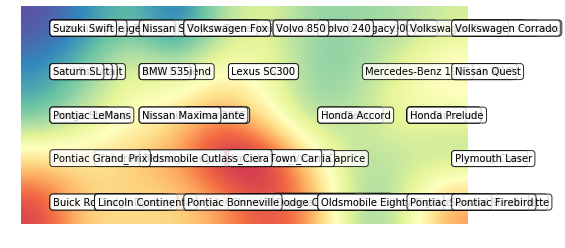

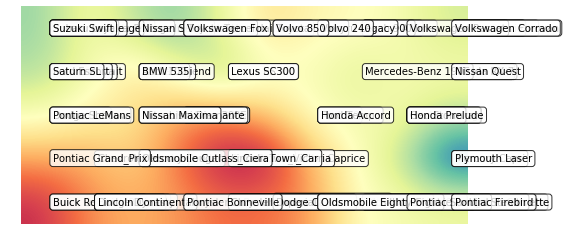

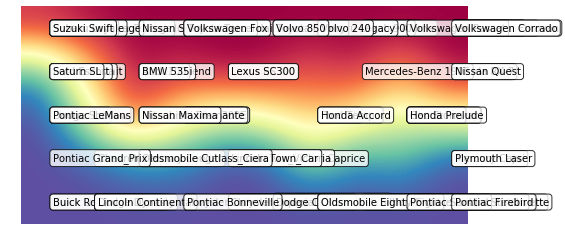

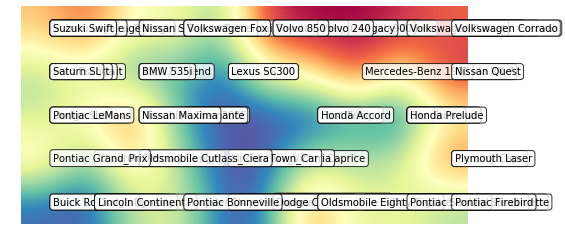

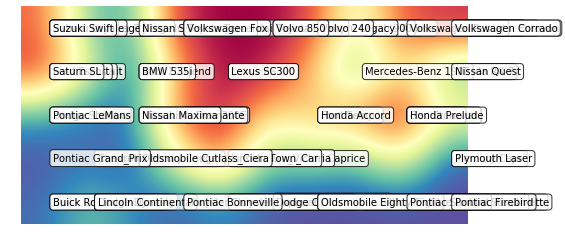

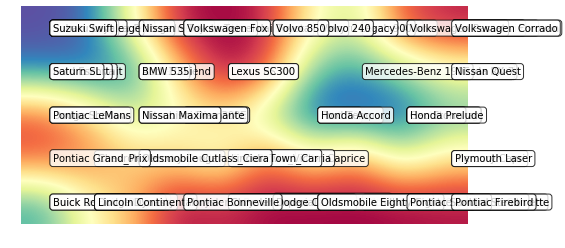

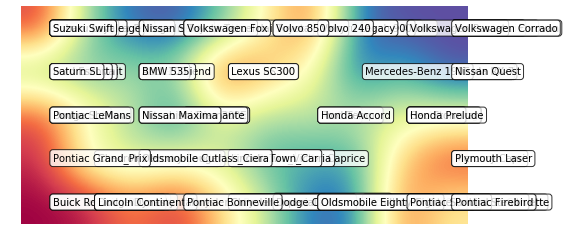

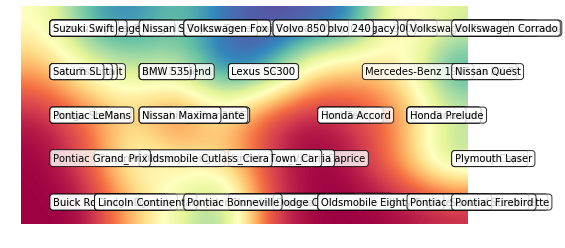

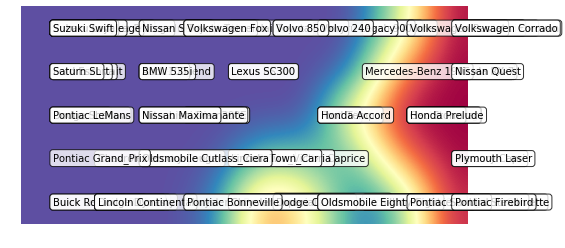

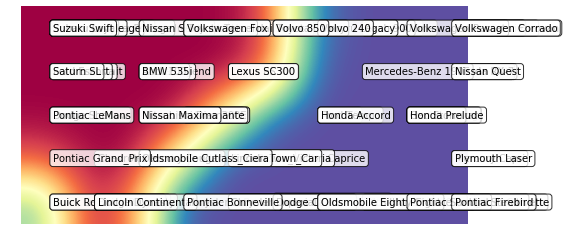

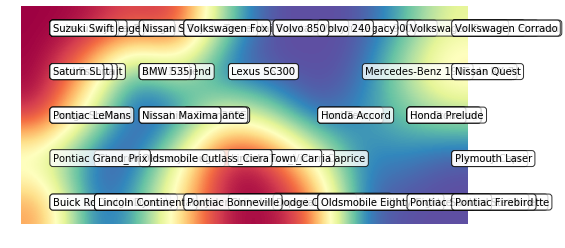

<module 'matplotlib.pyplot' from '/home/dmartins/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [27]:
som.view_component_planes(labels=[cartable.iloc[i]['make'] for i in range(cartable.shape[0])])

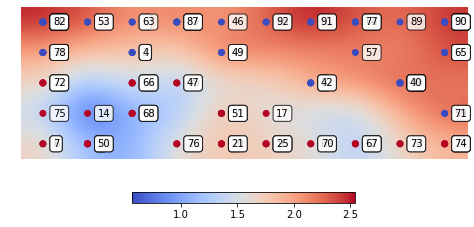

<module 'matplotlib.pyplot' from '/home/dmartins/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [28]:
som.view_activation_map(data_index=concept[0], bestmatches=True, labels=[i for i in range(cartable.shape[0])], colorbar=True, colormap='coolwarm')

In [29]:
n_rows, n_columns = 5, 10 #aspect ratio 16:9 #6, 8 #aspect ratio 4:3
som = somoclu.Somoclu(n_rows=n_rows, n_columns=n_columns, compactsupport=False, initialization='pca')
%time som.train(data=data, epochs=1000, radius0=max(n_rows, n_columns)*0.2)

CPU times: user 1.52 s, sys: 31.8 ms, total: 1.55 s
Wall time: 592 ms


In [30]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

In [57]:
def get_neighborhood(centroid_2d_position, step, x_size, y_size):
    search_space = [(centroid_2d_position[0], centroid_2d_position[1]),
                    (centroid_2d_position[0], centroid_2d_position[1]-step), 
                    (centroid_2d_position[0]-step, centroid_2d_position[1]-step),
                    (centroid_2d_position[0]-step, centroid_2d_position[1]),
                    (centroid_2d_position[0]-step, centroid_2d_position[1]+step), 
                    (centroid_2d_position[0], centroid_2d_position[1]+step),
                    (centroid_2d_position[0]+step, centroid_2d_position[1]+step),
                    (centroid_2d_position[0]+step, centroid_2d_position[1]),
                    (centroid_2d_position[0]+step, centroid_2d_position[1]-step)]

    neighborhood = []
    for region in search_space:
        if region[0] in range(x_size) and region[1] in range(y_size):
            neighborhood.append(list(region))

    return neighborhood#[:min(len(neighborhood), maxnb)-1]

from collections import Counter

def somoclu_labels_map(data, som, labels):
    """Returns a dictionary wm where wm[(i,j)] is a dictionary
    that contains the number of samples from a given label
    that have been mapped in position i,j.
    Parameters
    ----------
    data : np.array or list
        Data matrix.
    label : np.array or list
        Labels for each sample in data.
    """
    if not len(data) == len(labels):
        raise ValueError('data and labels must have the same length.')
    winmap = dict()
    for i in range(len(data)):
        w = som.bmus[i]
        w = tuple(w)
        if not w in winmap.keys():
            winmap[w] = []
        winmap[w] = winmap[w] + [labels[i]]

    for position in winmap.keys():
        winmap[position] = Counter(winmap[position])

    return winmap

def somoclu_classify(som, data, class_assignments):
    """Classifies each sample in data in one of the classes definited
    using the method labels_map.
    Returns a list of the same length of data where the i-th element
    is the class assigned to data[i].
    """
    winmap = class_assignments
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in range(len(data)):
        win_position = som.bmus[d]
        if tuple(win_position) in winmap.keys():
            result.append(winmap[tuple(win_position)].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [58]:
labels = [int(x in concept) for x in range(1, data.shape[0]+1)]
class_assignment = somoclu_labels_map(data, som, labels)

In [59]:
#predicted = [get_classification(x, som.bmus, 0, n_columns, n_rows, concept) for x in range(cartable.shape[0])]
predicted = somoclu_classify(som, data, class_assignment)

In [60]:
print(precision_recall_fscore_support(labels, predicted, average='micro'))
print(classification_report(labels, predicted))

(0.978494623655914, 0.978494623655914, 0.978494623655914, None)
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        85
           1       1.00      0.75      0.86         8

   micro avg       0.98      0.98      0.98        93
   macro avg       0.99      0.88      0.92        93
weighted avg       0.98      0.98      0.98        93



### OneClassSVM

In [ ]:
from sklearn import svm

In [ ]:
oneclass = svm.OneClassSVM(kernel='rbf', gamma=0.001, nu=0.1)

In [ ]:
examples = random.choices(concept, k=int(0.3*len(concept)))
normal = preprocessed_data.loc[examples]

#normal = preprocessed_data.loc[[i for i in range(1, cartable.shape[0]) if not i in examples]]
#abnormal = preprocessed_data.loc[concept]

oneclass.fit(normal)

In [ ]:
predicted = [int(y < 1) for y in oneclass.predict(data)]

In [ ]:
print(precision_recall_fscore_support(labels, predicted, average='micro'))
print(classification_report(labels, predicted))

### Negative Selection

In [ ]:
def negative_selection(training_data, num_of_detectors, feature_size, distance_metric, affinity_threshold):
    notnormal_detectors = []
    while len(notnormal_detectors) < num_of_detectors:
        detector = [random.random() for x in range(feature_size)]
        matched = False
        for data in training_data:
            if distance_metric(data, detector) < affinity_threshold:
                matched = True
                break
        if not matched:
            notnormal_detectors.append(detector)
    return notnormal_detectors

In [ ]:
import scipy.spatial.distance as dist
affinity_threshold = 0.68
negative_detectors = negative_selection(preprocessed_data.loc[examples].values, num_of_detectors=len(examples), 
                                        feature_size=len(data[0]), 
                                        distance_metric=dist.cosine, 
                                        affinity_threshold=affinity_threshold)

In [ ]:
negatives = set()
for i in range(preprocessed_data.shape[0]):
    for detector in negative_detectors:
        if dist.cosine(preprocessed_data.iloc[i].values, detector) <= affinity_threshold:
            negatives.add(i)
            break

In [ ]:
predicted = ['Unlabeled' if i in negatives else 'Positive' for i in range(cartable.shape[0])]

In [ ]:
print(classification_report(labels, predicted))